In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv('d:/course/R/mid_proj/crawler/Pokemon-maxcp-status.csv')
add_df = pd.read_csv('d:/course/R/mid_proj/crawler/Pokemon-without-status.csv')

In [3]:
features = list(all_df.columns)
label = features.pop(-3)

In [4]:
Types = []
for i in range(all_df.shape[0]):
    type1 = all_df.loc[i, "Type1"]
    type2 = all_df.loc[i, "Type2"]
    if not type1 in Types:
        Types.append(type1)
    if not type1 in Types:
        Types.append(type2)
    
for i in range(add_df.shape[0]):
    type1 = add_df.loc[i, "Type1"]
    type2 = add_df.loc[i, "Type2"]
    if not type1 in Types:
        Types.append(type1)
    if not type1 in Types:
        Types.append(type2)
    
TypeDict = {}
for i, v in enumerate(Types):
    TypeDict[v] = i

features.extend(Types)
features.append(label)

In [5]:
all_df  = all_df.reindex(features, axis=1)
all_df = all_df.fillna(0)

In [6]:
all_df = all_df.fillna(0)
for i in range(all_df.shape[0]):
    type1 = all_df.loc[i, "Type1"]
    type2 = all_df.loc[i, "Type2"]
    all_df.loc[i, type1] = 1
    all_df.loc[i, type2] = 1

In [7]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [8]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 570 train: 457 test: 113


In [9]:
train_df.tail()

Name    English Type1 Type2  Height(m)  Weight(kg)   HP  Attack  Defense  \
564   櫻花兒    Cherrim     草     草        0.5         9.3   70      60       70   
566   海兔獸  Gastrodon     水    地面        0.9        29.9  111      83       68   
567   洛托姆      Rotom     電    幽靈        0.3         0.3   50      50       77   
568   美錄坦     Meltan     鋼     鋼        0.2         8.0   46      65       65   
569  美錄梅塔   Melmetal     鋼     鋼        2.5       800.0  135     143      143   

     Sp. Atk  ...   格鬥  超能力   岩石   幽靈    冰    龍    惡    鋼   飛行   max-cp  
564       87  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2048.01  
566       92  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2324.77  
567       95  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  2031.47  
568       55  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1068.00  
569       80  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  3599.81  

[5 rows x 33 columns]

In [10]:
add_df  = add_df.reindex(features, axis=1)
add_df = add_df.fillna(0)

In [11]:
add_df = add_df.fillna(0)
for i in range(add_df.shape[0]):
    type1 = add_df.loc[i, "Type1"]
    type2 = add_df.loc[i, "Type2"]
    add_df.loc[i, type1] = 1
    add_df.loc[i, type2] = 1

In [12]:
add_df = add_df[:-1]

In [13]:
def PreprocessData(raw_df):
    df=raw_df.drop(['Name', 'English', "Type1", "Type2"], axis=1)
#     age_mean = df['age'].mean()
#     df['age'] = df['age'].fillna(age_mean)
#     fare_mean = df['fare'].mean()
#     df['fare'] = df['fare'].fillna(fare_mean)
#     x_OneHot_df = pd.get_dummies(data=df,columns=["Type" ])

    ndarray = df.values
    Features = ndarray[:,:-1]
    Label = ndarray[:,-1]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [14]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [15]:
predict_Features , predict_Label = PreprocessData(add_df)

In [16]:
input_dim = train_Features.shape[1]
output_dim = 1
hidden_1 = 1024
hidden_2 = 512
hidden_3 = 256
hidden_4 = 128
batch_size = 30
epochs = 100

In [17]:
def layer(output_dim,input_dim,inputs,level = 1, activation=None):
    W = tf.get_variable('W'+str(level), [input_dim, hidden_1], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b = tf.get_variable('b'+str(level), [hidden_1], initializer=tf.zeros_initializer())
    XWb = tf.add(tf.matmul(inputs, W) , b)
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [18]:
X = tf.placeholder(shape=[None, input_dim], dtype=tf.float32)
Y = tf.placeholder(shape=[None], dtype=tf.float32)

In [19]:
# h1 = layer(hidden_1, input_dim, X, 1, activation=tf.nn.relu)
# h2 = layer(hidden_2, hidden_1, h1, 2, activation=tf.nn.relu)
# h3 = layer(hidden_3, hidden_2, h2, 3, activation=tf.nn.relu)
# h4 = layer(hidden_4, hidden_3, h3, 4, activation=tf.nn.relu)
# out = layer(output_dim, hidden_4, h4, 5, activation=tf.transpose)

In [20]:
# 第一層
W1 = tf.get_variable('W1', [input_dim, hidden_1], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b1 = tf.get_variable('b1', [hidden_1], initializer=tf.zeros_initializer())
# 第二層
W2 = tf.get_variable('W2', [hidden_1, hidden_2], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b2 = tf.get_variable('b2', [hidden_2], initializer=tf.zeros_initializer())
# 第三層
W3 = tf.get_variable('W3', [hidden_2, hidden_3], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b3 = tf.get_variable('b3', [hidden_3], initializer=tf.zeros_initializer())
# 第四層
W4 = tf.get_variable('W4', [hidden_3, hidden_4], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b4 = tf.get_variable('b4', [hidden_4], initializer=tf.zeros_initializer())
# 輸出層
W5 = tf.get_variable('W5', [hidden_4, output_dim], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b5 = tf.get_variable('b5', [output_dim], initializer=tf.zeros_initializer())

In [21]:
h1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
h2 = tf.nn.relu(tf.add(tf.matmul(h1, W2), b2))
h3 = tf.nn.relu(tf.add(tf.matmul(h2, W3), b3))
h4 = tf.nn.relu(tf.add(tf.matmul(h3, W4), b4))
out = tf.transpose(tf.add(tf.matmul(h4, W5), b5))

In [22]:
loss_fn = tf.reduce_mean(tf.squared_difference(out, Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.003).minimize(loss_fn)

In [23]:
from matplotlib import pyplot as plt

Train loss: 4463754.5
Test loss: 4609678.0


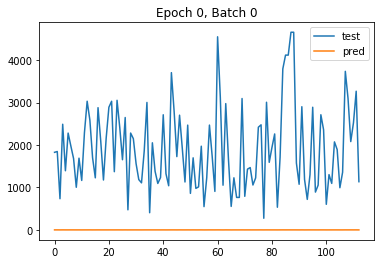

Train loss: 1210002.9
Test loss: 1569134.8


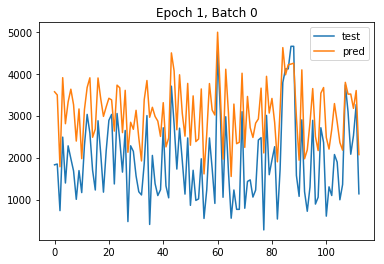

Train loss: 493634.56
Test loss: 711716.1


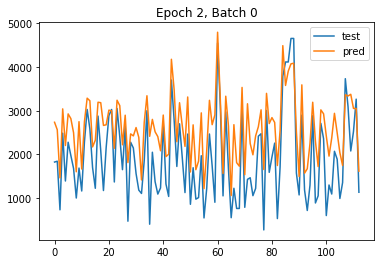

Train loss: 263428.5
Test loss: 408835.78


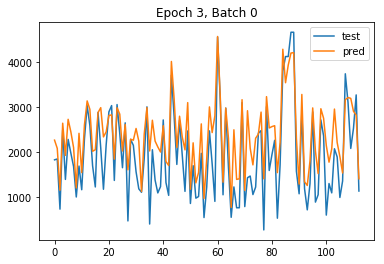

Train loss: 195866.06
Test loss: 307622.72


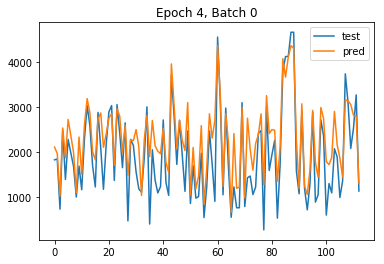

Train loss: 151019.11
Test loss: 217581.11


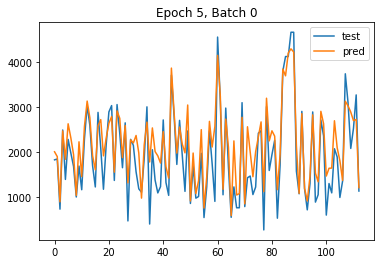

Train loss: 127787.23
Test loss: 189906.3


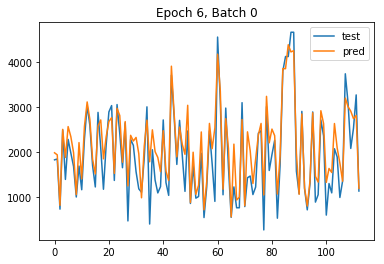

Train loss: 148940.67
Test loss: 304130.84


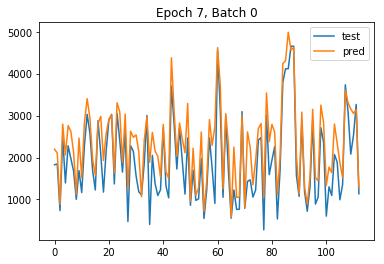

Train loss: 98075.664
Test loss: 189833.98


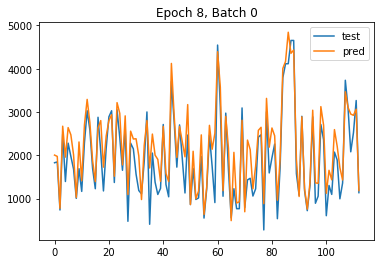

Train loss: 91283.734
Test loss: 203907.73


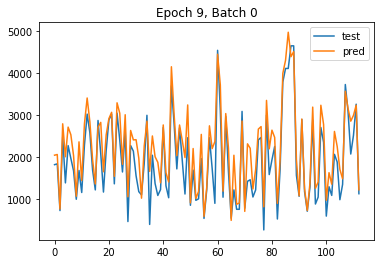

Train loss: 116820.35
Test loss: 91659.6


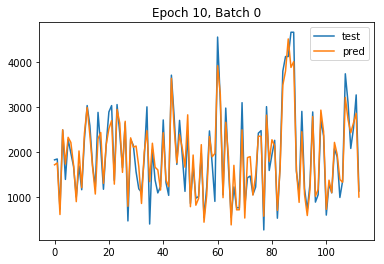

Train loss: 63690.03
Test loss: 132042.61


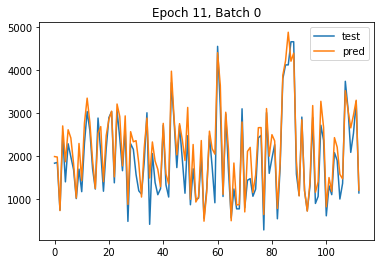

Train loss: 56524.145
Test loss: 152703.81


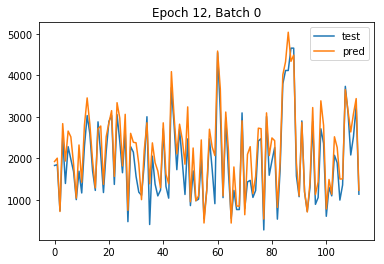

Train loss: 52477.453
Test loss: 96874.055


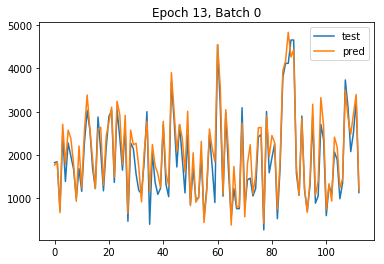

Train loss: 67147.31
Test loss: 227535.75


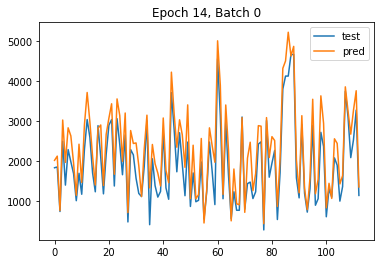

Train loss: 47218.082
Test loss: 83918.11


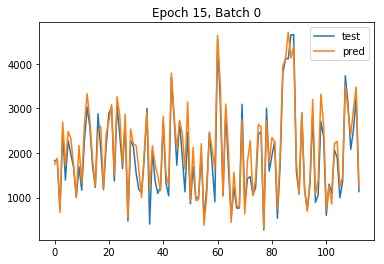

Train loss: 42227.195
Test loss: 94217.4


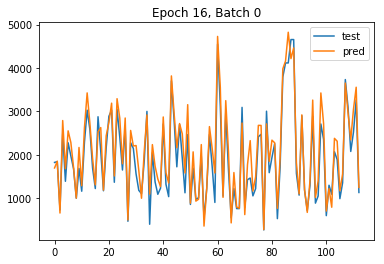

Train loss: 36763.81
Test loss: 145333.52


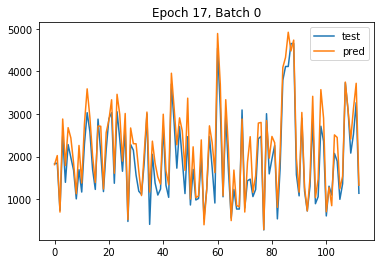

Train loss: 34934.777
Test loss: 130286.21


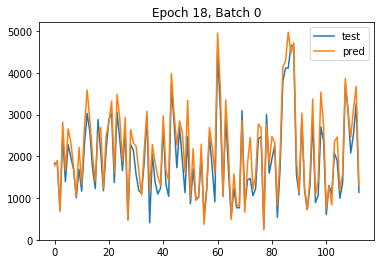

Train loss: 34388.1
Test loss: 155685.08


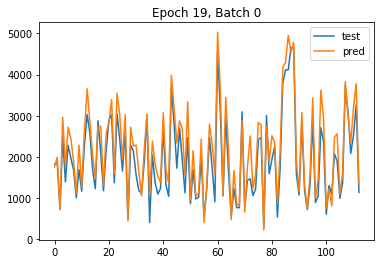

Train loss: 45825.926
Test loss: 80285.695


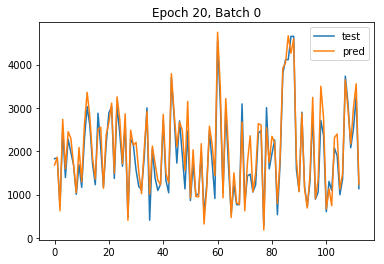

Train loss: 35628.316
Test loss: 105272.78


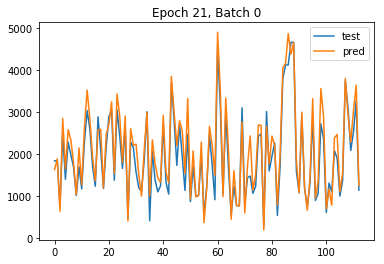

Train loss: 30273.713
Test loss: 152619.72


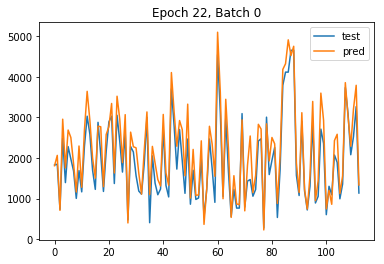

Train loss: 29337.146
Test loss: 154272.53


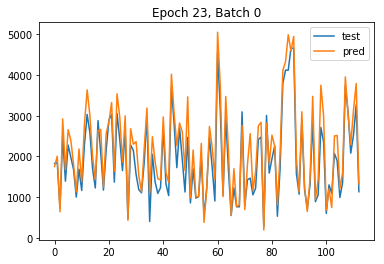

Train loss: 28421.096
Test loss: 123270.34


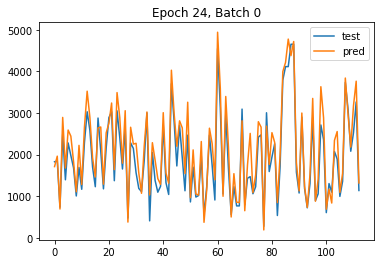

Train loss: 26229.795
Test loss: 171371.19


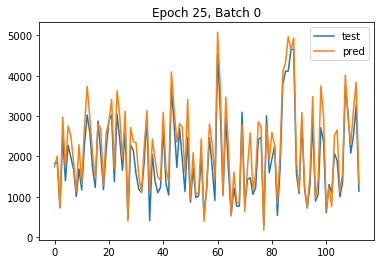

Train loss: 27685.111
Test loss: 198630.27


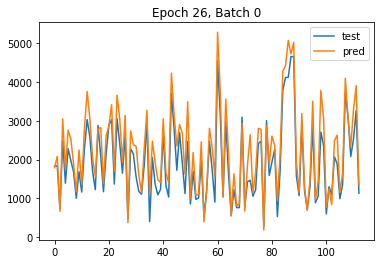

Train loss: 28918.094
Test loss: 114616.66


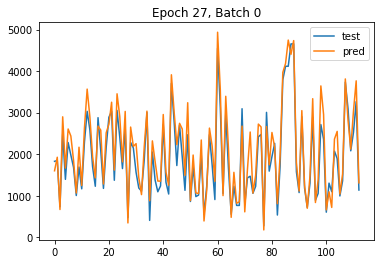

Train loss: 23718.992
Test loss: 178230.88


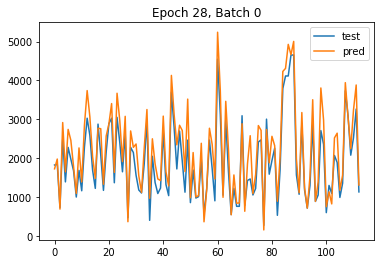

Train loss: 22266.814
Test loss: 176691.56


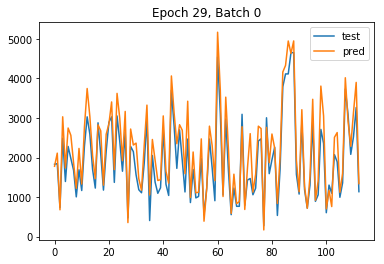

Train loss: 20795.098
Test loss: 182409.25


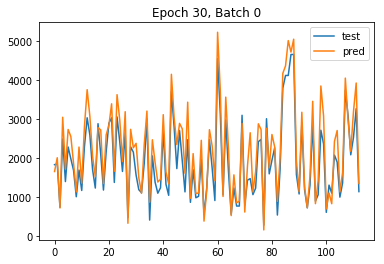

Train loss: 24189.943
Test loss: 206517.78


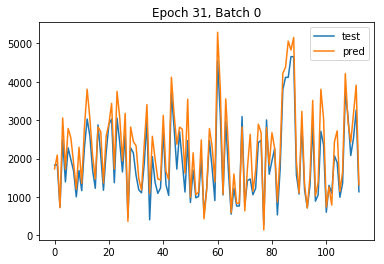

Train loss: 20687.729
Test loss: 193807.5


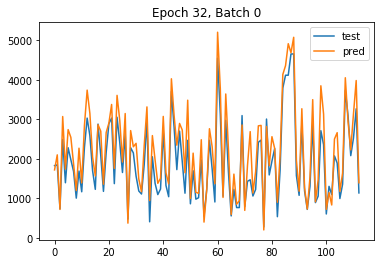

Train loss: 19142.473
Test loss: 138119.36


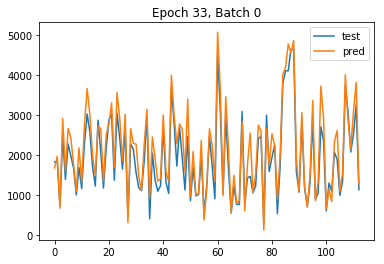

Train loss: 17953.887
Test loss: 155083.47


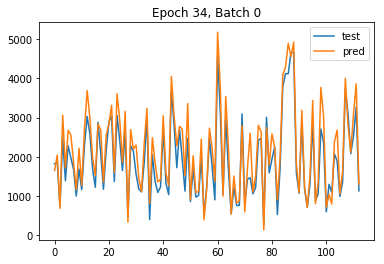

Train loss: 18476.531
Test loss: 208198.83


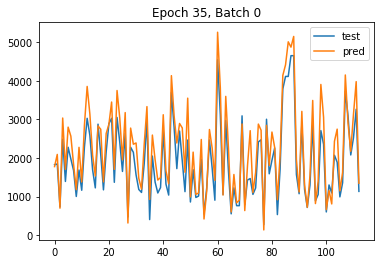

Train loss: 31891.248
Test loss: 266726.62


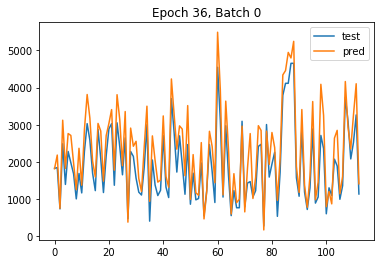

Train loss: 23405.643
Test loss: 233391.47


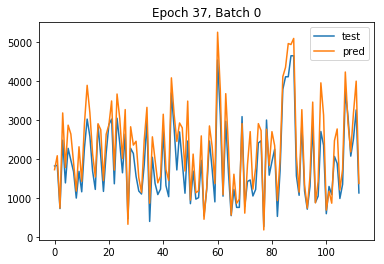

Train loss: 15367.429
Test loss: 178585.95


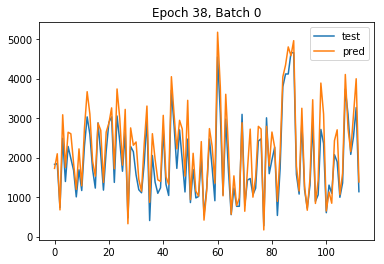

Train loss: 14923.849
Test loss: 166171.42


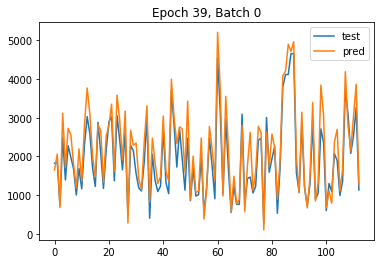

Train loss: 19136.053
Test loss: 219394.56


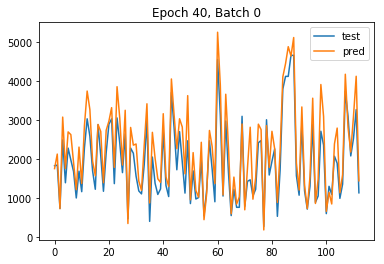

Train loss: 18339.486
Test loss: 222769.28


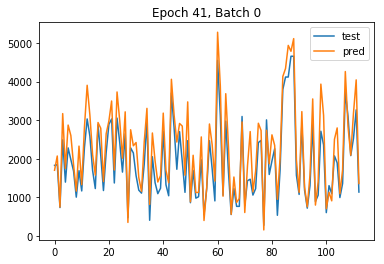

Train loss: 18261.701
Test loss: 220807.44


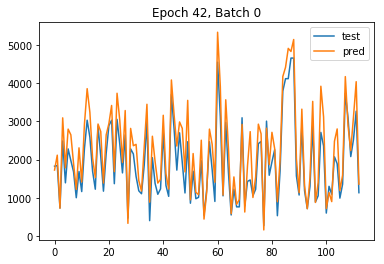

Train loss: 26737.723
Test loss: 288195.25


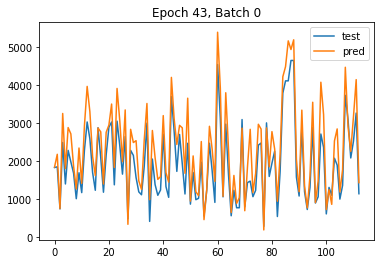

Train loss: 13290.688
Test loss: 188174.22


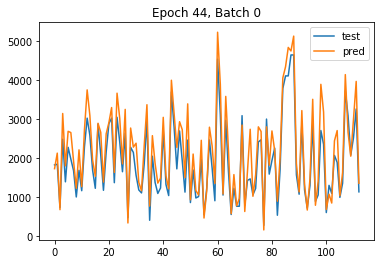

Train loss: 12350.443
Test loss: 166050.12


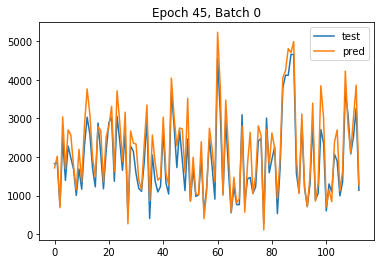

Train loss: 13452.006
Test loss: 149962.92


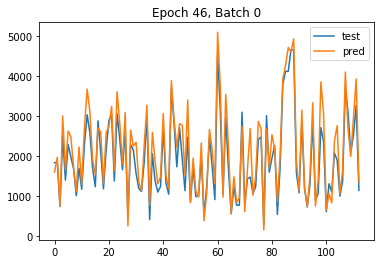

Train loss: 11359.164
Test loss: 174352.45


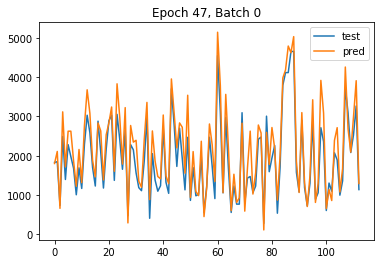

Train loss: 10115.399
Test loss: 172825.89


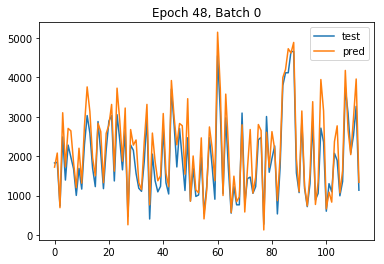

Train loss: 11302.845
Test loss: 204546.77


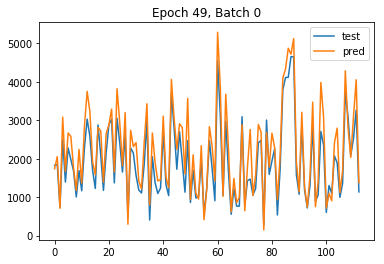

Train loss: 15875.028
Test loss: 122323.2


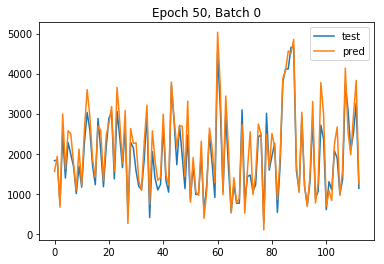

Train loss: 20585.402
Test loss: 122727.93


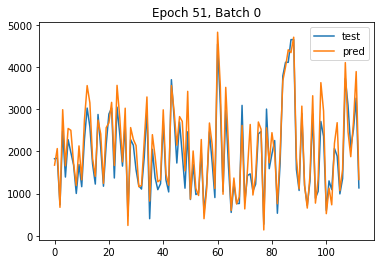

Train loss: 12131.062
Test loss: 152544.58


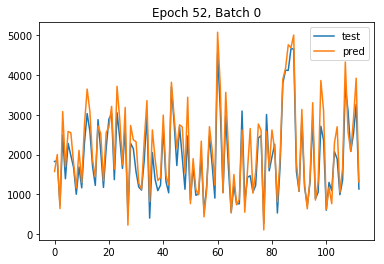

Train loss: 29468.113
Test loss: 106568.086


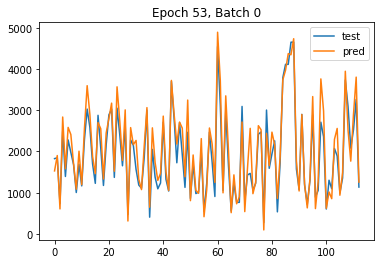

Train loss: 11884.237
Test loss: 193007.84


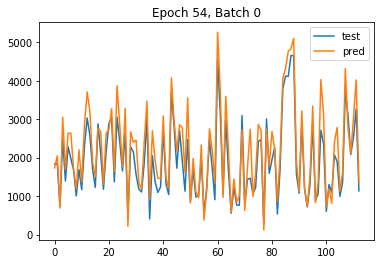

Train loss: 9085.886
Test loss: 183263.23


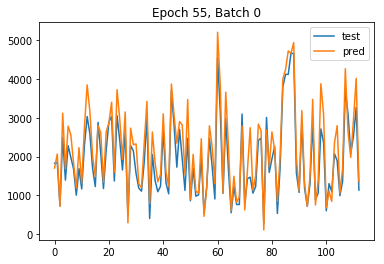

Train loss: 11385.545
Test loss: 140906.45


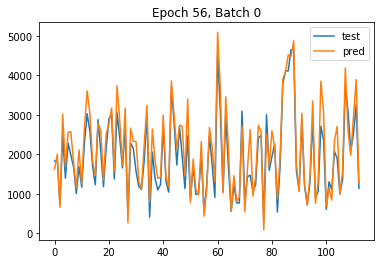

Train loss: 8101.1304
Test loss: 174852.0


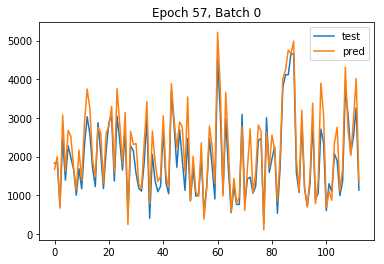

Train loss: 8227.682
Test loss: 190513.48


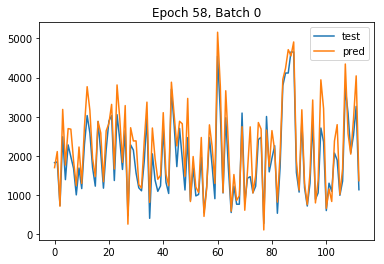

Train loss: 8545.378
Test loss: 156717.42


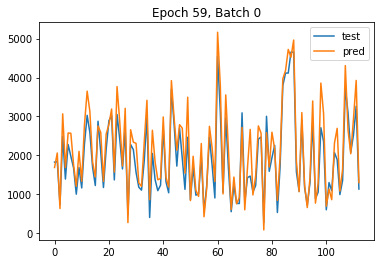

Train loss: 7565.2397
Test loss: 179795.16


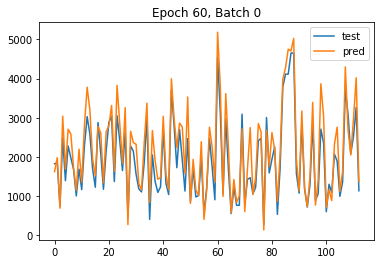

Train loss: 8038.745
Test loss: 204672.28


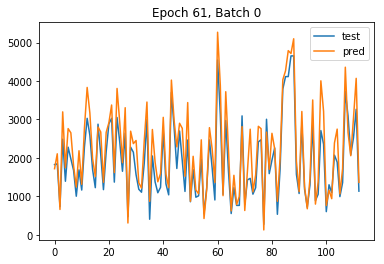

Train loss: 12046.102
Test loss: 249125.56


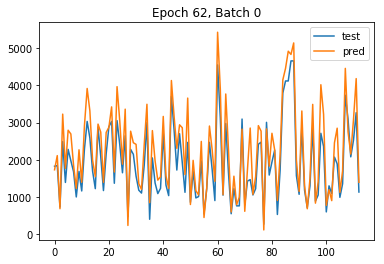

Train loss: 10235.9375
Test loss: 159996.83


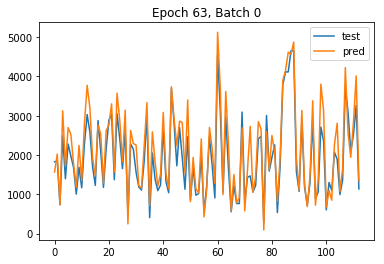

Train loss: 7153.832
Test loss: 177056.42


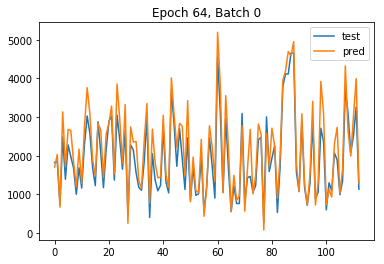

Train loss: 13383.383
Test loss: 253339.19


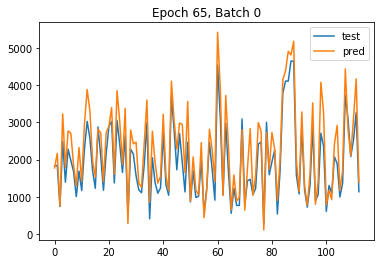

Train loss: 33014.566
Test loss: 102152.95


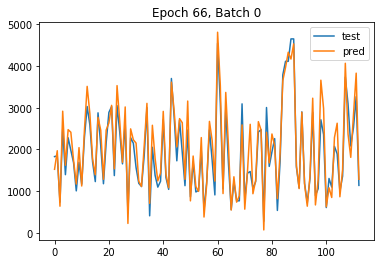

Train loss: 10625.179
Test loss: 205826.83


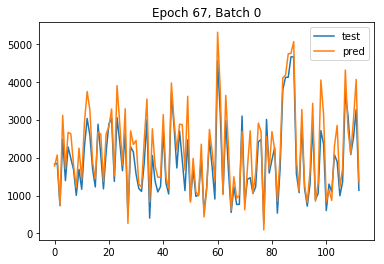

Train loss: 12451.3
Test loss: 129997.19


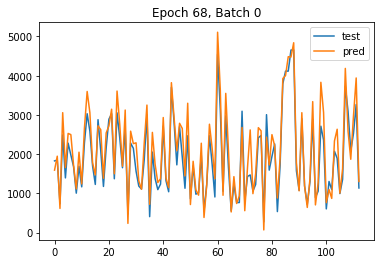

Train loss: 11626.298
Test loss: 235270.16


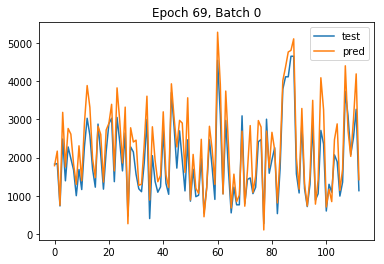

Train loss: 10678.008
Test loss: 138795.97


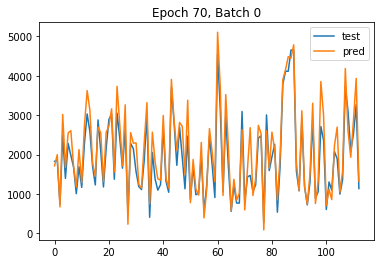

Train loss: 7794.988
Test loss: 207800.17


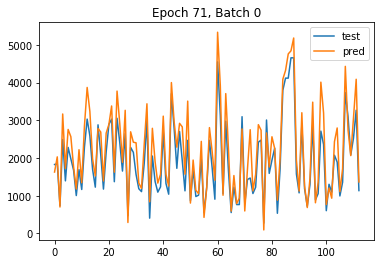

Train loss: 6265.939
Test loss: 189236.92


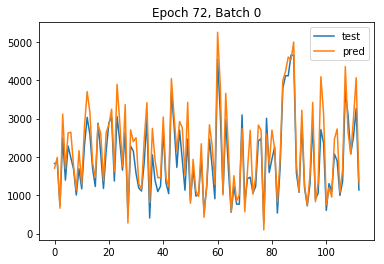

Train loss: 17517.492
Test loss: 115461.21


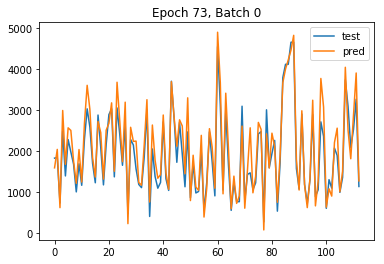

Train loss: 8236.968
Test loss: 235148.11


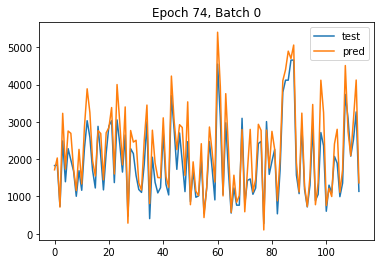

Train loss: 6368.76
Test loss: 171658.94


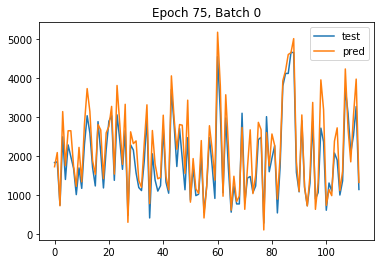

Train loss: 8983.101
Test loss: 226156.0


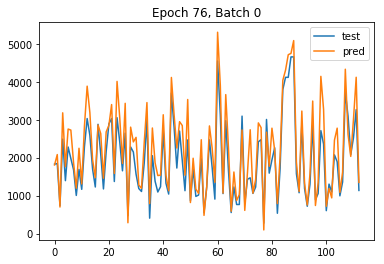

Train loss: 6407.113
Test loss: 192068.67


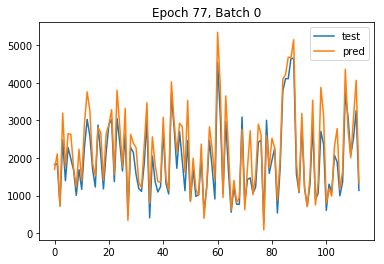

Train loss: 5709.053
Test loss: 209237.9


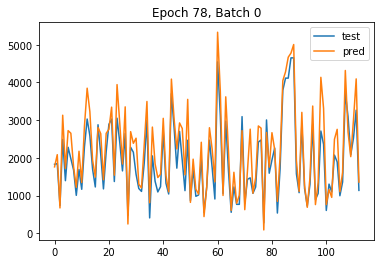

Train loss: 4738.523
Test loss: 199552.56


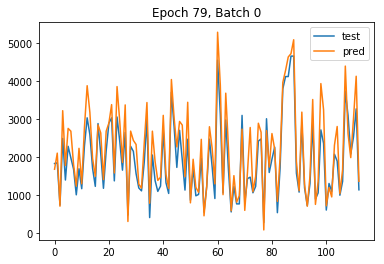

Train loss: 5377.1807
Test loss: 224287.47


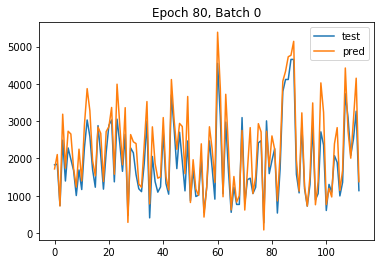

Train loss: 7493.1216
Test loss: 162400.75


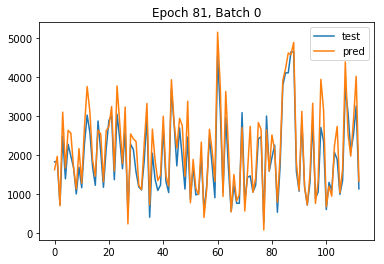

Train loss: 11913.065
Test loss: 249988.64


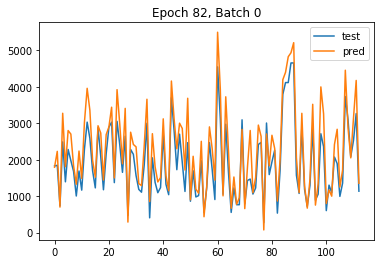

Train loss: 7101.0894
Test loss: 181108.75


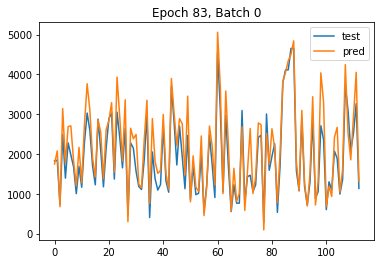

Train loss: 6488.0464
Test loss: 192506.7


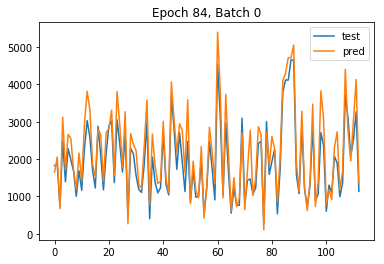

Train loss: 5673.7983
Test loss: 172750.72


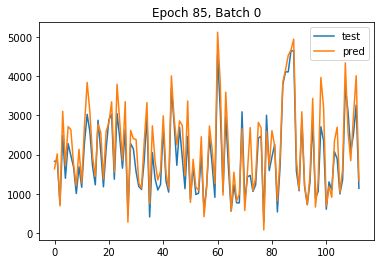

Train loss: 4480.422
Test loss: 197020.03


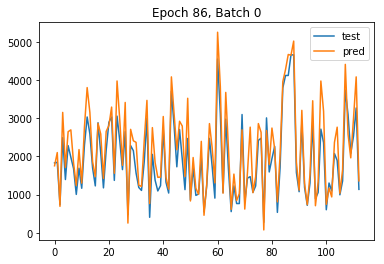

Train loss: 4960.8604
Test loss: 212833.06


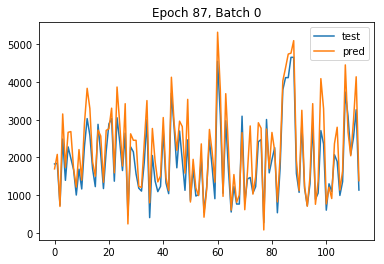

Train loss: 7584.7324
Test loss: 163675.89


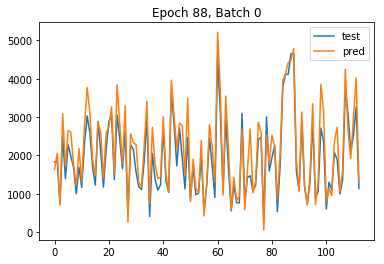

Train loss: 6556.8184
Test loss: 163740.48


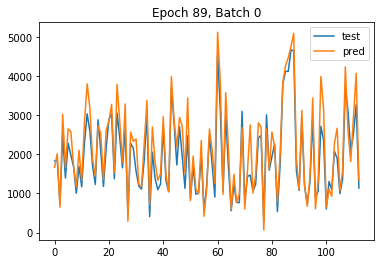

Train loss: 4693.9395
Test loss: 198331.72


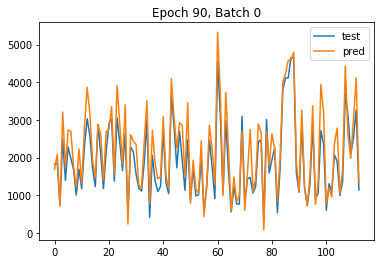

Train loss: 4787.6025
Test loss: 219984.78


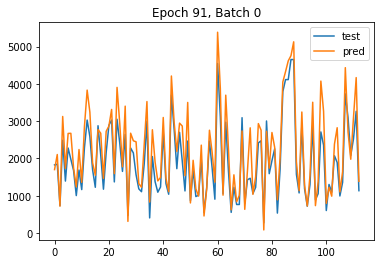

Train loss: 4976.824
Test loss: 220347.66


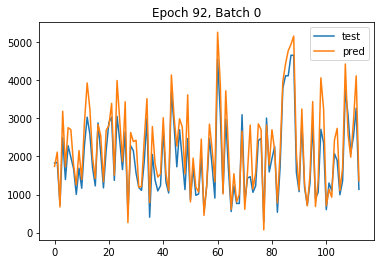

Train loss: 12461.559
Test loss: 140685.22


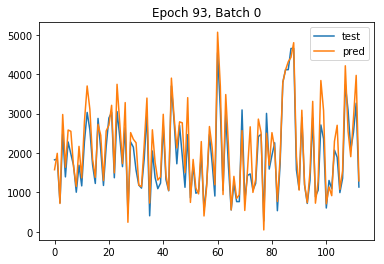

Train loss: 5725.3193
Test loss: 225855.86


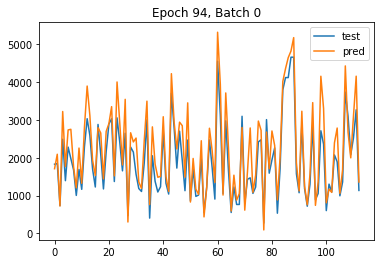

Train loss: 4312.7183
Test loss: 211224.39


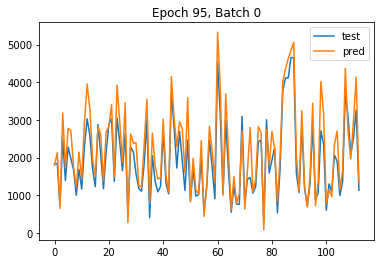

Train loss: 3477.3225
Test loss: 189371.2


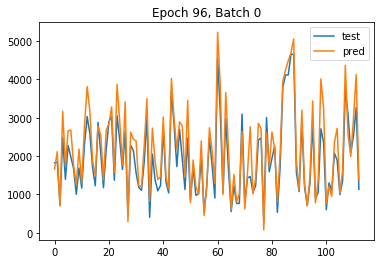

Train loss: 3651.2107
Test loss: 186278.23


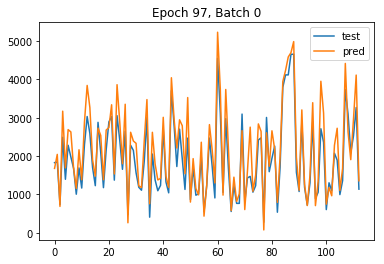

Train loss: 5124.979
Test loss: 230757.89


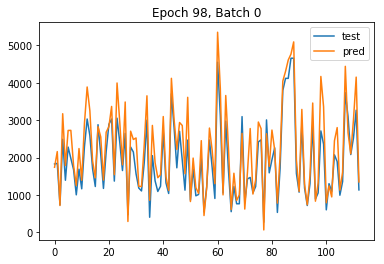

Train loss: 3791.7449
Test loss: 175070.12


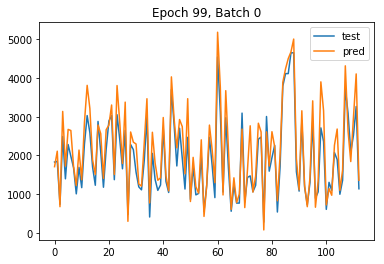

In [24]:
with tf.Session() as sess:
    # 初始化所有變數
    sess.run(tf.global_variables_initializer())

    for e in range(epochs):
        # 將資料打亂
        shuffle_indices = numpy.random.permutation(numpy.arange(train_Label.shape[0]))
        train_Features = train_Features[shuffle_indices]
        train_Label = train_Label[shuffle_indices]

        for i in range(train_Label.shape[0] // batch_size):
            start = i * batch_size
            batch_x = train_Features[start : start + batch_size]
            batch_y = train_Label[start : start + batch_size]
            sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})

            if i % 50 == 0:
                print('Train loss:', sess.run(loss_fn, feed_dict={X: train_Features, Y: train_Label}))
                print('Test loss:', sess.run(loss_fn, feed_dict={X: test_Features, Y: test_Label}))
                y_pred = sess.run(out, feed_dict={X: test_Features})
                y_pred = numpy.squeeze(y_pred)
                plt.plot(test_Label, label='test')
                plt.plot(y_pred, label='pred')
                plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
                plt.legend()
                plt.show()
    predict_Label = sess.run(out, feed_dict={X: predict_Features})
    predict_Label = numpy.squeeze(predict_Label)

In [25]:
predict_Label

array([3682.1218 ,  736.3476 , 1489.3684 , 2543.8708 ,  895.7115 ,
       2163.7588 , 3616.9287 ,  870.95825, 1872.4521 , 3381.0767 ,
        478.18332, 1835.9438 ,  600.06665, 1441.7344 , 3029.5464 ,
        699.6178 , 2279.0068 ,  877.4892 , 2770.6094 ,  832.42365,
       2749.8765 ,  800.3464 , 2731.984  ,  933.13165, 2960.8562 ,
        529.4715 , 1250.726  , 3000.9004 ,  678.92413, 2615.118  ,
        861.09644, 2198.0461 , 3737.4329 ,  799.6229 , 1699.9307 ,
       1156.261  , 3884.761  , 2043.3148 , 1358.3903 , 2458.682  ,
       4057.9702 ,  633.09045, 1496.446  , 3042.9585 , 2560.6204 ,
       2588.6204 ,  943.71063, 1495.2035 , 2687.785  ,  391.44003,
       1006.1726 , 2391.399  ,  636.59863, 1982.6658 ,  791.3419 ,
       2544.3748 ,  949.43066, 1447.1179 , 3353.9634 , 1256.5106 ,
       2516.434  , 1067.1099 , 2878.2542 , 1410.845  , 2531.591  ,
       2394.     ,  696.382  , 2273.844  , 1596.6562 , 3271.819  ,
       2254.2412 , 4270.812  ,  747.08856, 2457.3228 , 1195.92

In [27]:
add_df.loc[:, "max-cp"] = predict_Label

In [28]:
add_df

Name      English Type1 Type2  Height(m)  Weight(kg)   HP  Attack  \
0     比克提尼      Victini   超能力     火        0.4         4.0  100     100   
1      藤藤蛇        Snivy     草     草        0.6         8.1   45      45   
2      青藤蛇      Servine     草     草        0.8        16.0   60      60   
3      君主蛇    Serperior     草     草        3.3        63.0   75      75   
4      暖暖豬        Tepig     火     火        0.5         9.9   65      63   
5      炒炒豬      Pignite     火    格鬥        1.0        55.0   90      93   
6      炎武王       Emboar     火    格鬥        1.6       150.0  110     123   
7      水水獺     Oshawott     水     水        0.5         5.9   55      55   
8      雙刃丸       Dewott     水     水        0.8        24.5   75      75   
9      大劍鬼     Samurott     水     水        1.5        94.6   95     100   
10     探探鼠       Patrat    一般    一般        0.5        11.6   45      55   
11     步哨鼠      Watchog    一般    一般        1.1        27.0   60      85   
12     小約克     Lillipup    一般    一般        0.4         4.1   45      60   
13     哈約克      Herdier    一般    一般        0.9        14.7   65      80   
14     長毛狗    Stoutland    一般    一般        1.2        61.0   85     110   
15     扒手貓     Purrloin     惡     惡        0.4        10.1   41      50   
16      酷豹      Liepard     惡     惡        1.1        37.5   64      88   
17     花椰猴      Pansage     草     草        0.6        10.5   50      53   
18     花椰猿     Simisage     草     草        1.1        30.5   75      98   
19     爆香猴      Pansear     火     火        0.6        11.0   50      53   
20     爆香猿     Simisear     火     火        1.0        28.0   75      98   
21     冷水猴      Panpour     水     水        0.6        13.5   50      53   
22     冷水猿     Simipour     水     水        1.0        29.0   75      98   
23     食夢夢        Munna   超能力   超能力        0.6        23.3   76      25   
24     夢夢蝕     Musharna   超能力   超能力        1.1        60.5  116      55   
25     豆豆鴿       Pidove    一般    飛行        0.3         2.1   50      55   
26     咕咕鴿    Tranquill    一般    飛行        0.6        15.0   62      77   
27    高傲雉雞     Unfezant    一般    飛行        1.2        29.0   80     115   
28     斑斑馬      Blitzle     電     電        0.8        29.8   45      60   
29    雷電斑馬    Zebstrika     電     電        1.6        79.5   75     100   
..     ...          ...   ...   ...        ...         ...  ...     ...   
186   鐵臂槍蝦    Clauncher     水     水        0.5         8.3   50      53   
187   鋼炮臂蝦    Clawitzer     水     水        1.3        35.3   71      73   
188    傘電蜥   Helioptile     電    一般        0.5         6.0   44      38   
189   光電傘蜥    Heliolisk     電    一般        1.0        21.0   62      55   
190   寶寶暴龍       Tyrunt    岩石     龍        0.8        26.0   58      89   
191    怪顎龍    Tyrantrum    岩石     龍        2.5       270.0   82     121   
192    冰雪龍       Amaura    岩石     冰        1.3        25.2   77      59   
193   冰雪巨龍      Aurorus    岩石     冰        2.7       225.0  123      77   
194   仙子伊布      Sylveon    妖精    妖精        1.0        23.5   95      65   
195   摔角鷹人     Hawlucha    格鬥    飛行        0.8        21.5   78      92   
196    咚咚鼠      Dedenne     電    妖精        0.2         2.2   67      58   
197    小碎鑽      Carbink    岩石    妖精        0.3         5.7   50      50   
198    黏黏寶        Goomy     龍     龍        0.3         2.8   45      50   
199    黏美兒      Sliggoo     龍     龍        0.8        17.5   68      75   
200    黏美龍       Goodra     龍     龍        2.0       150.5   90     100   
201    鑰圈兒       Klefki     鋼    妖精        0.2         3.0   57      80   
202    小木靈     Phantump    幽靈     草        0.4         7.0   43      70   
203    朽木妖    Trevenant    幽靈     草        1.5        71.0   85     110   
204     冰寶     Bergmite     冰     冰        1.0        99.5   55      69   
205    冰岩怪      Avalugg     冰     冰        2.0       505.0   95     117   
206     嗡蝠       Noibat    飛行     龍        0.5         8.0   40      30   
207    音波龍      Noivern    飛行  

In [29]:
add_df.to_csv('MLP_predict.csv', encoding='utf8')